# Iris Species

## Project Goal: 

This project aims to analyze the Iris dataset using classification and clustering techniques. I apply supervised learning models to classify species and unsupervised learning methods to identify natural groupings in the data. I also perform dimensionality reduction and anomaly detection.

### 1. Import Libraries

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

### 2. Reading Data

In [2]:
# Unzip the file
zip_file_path = 'Iris Species.zip'
extracted_folder = 'Iris_data'

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Load the dataset into a DataFrame
csv_file_name = os.path.join(extracted_folder, 'Iris.csv')
df = pd.read_csv(csv_file_name)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop the 'Id' column
df = df.drop(columns=['Id'])

# Display the first few rows to confirm
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Explore the Dataframe

In [5]:
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types and non-null counts:")
print(df.info())


Missing values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Key Findings

- There are 150 samples (rows) for each feature, which means the dataset is complete with no missing values for these attributes.
- Sepal Length has a wider range (from 4.3 cm to 7.9 cm) compared to Sepal Width, suggesting more diversity in sepal length.
- Petal Length and Petal Width show greater spread and variability, with Petal Length having the highest standard deviation, indicating that petal size varies more among the species.
- The mean values of each feature seem to be fairly close to the median (50%), suggesting that the data might be approximately symmetric for most features.

### 4. Outlier Detection

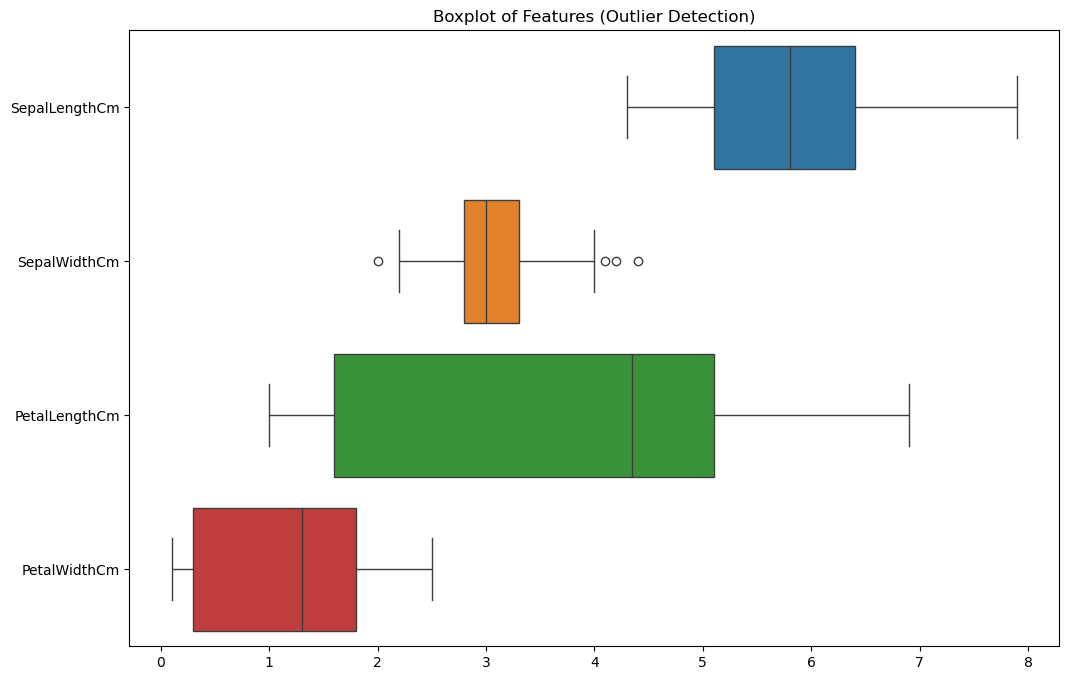

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863
std,0.834093,0.395145,1.757117,0.760365
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [8]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], orient='h')
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()

# Identify and remove potential outliers using the IQR method
def detect_and_remove_outliers(df, columns):
    for feature in columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df = detect_and_remove_outliers(df, numerical_features)

# Verify dataset after removing outliers
df.describe()

#### Key Findings (after removing outliers)

- All columns have a count of 146, which indicates the dataset has 146 records, as opposed to the earlier dataset with 150 records.
- SepalLengthCm and PetalLengthCm have no potential outliers.
- PetalWidthCm also has no potential outliers.
- SepalWidthCm does have potential outliers, particularly for values that seem to be outside of the typical range for this feature.

### 6. Data Visualization

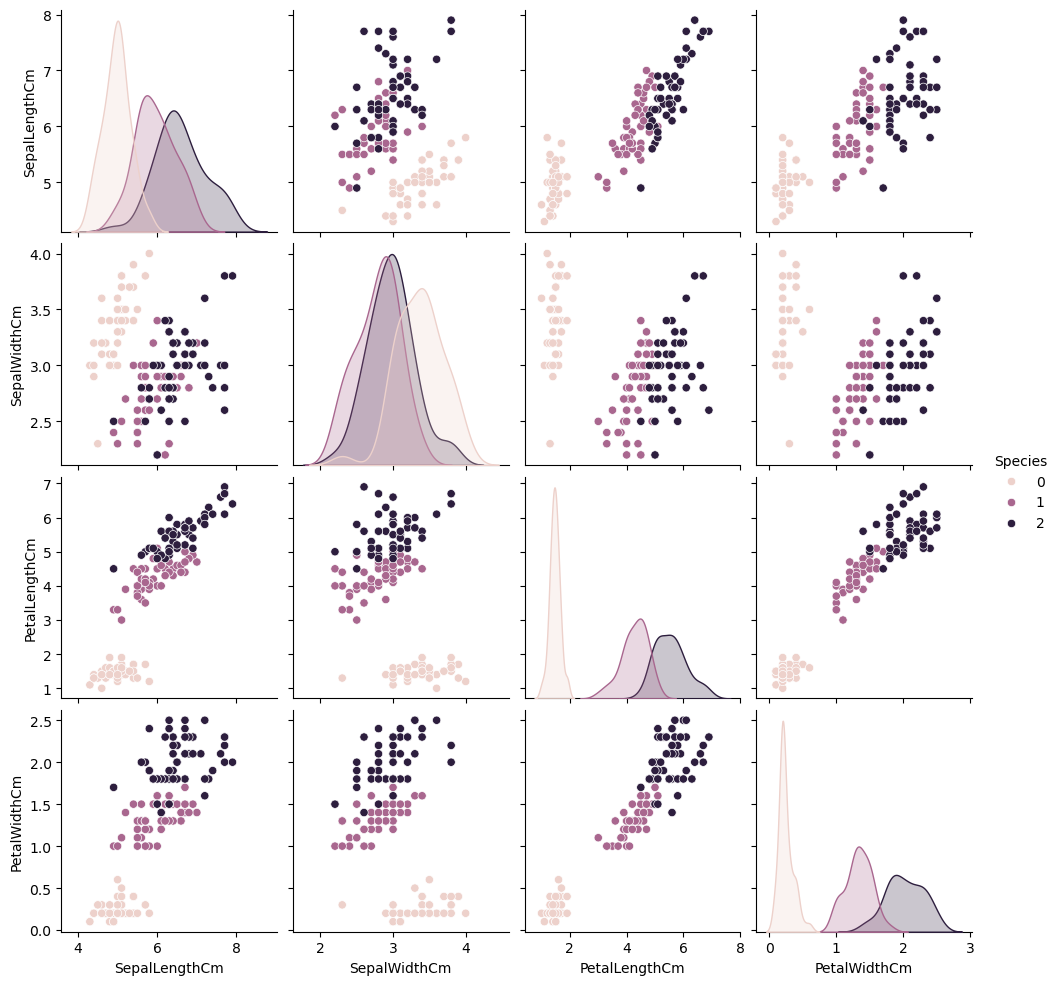

In [9]:
# Encode categorical target
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

# Visualize the dataset
sns.pairplot(df, hue='Species')
plt.show()

In [10]:
# Split features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

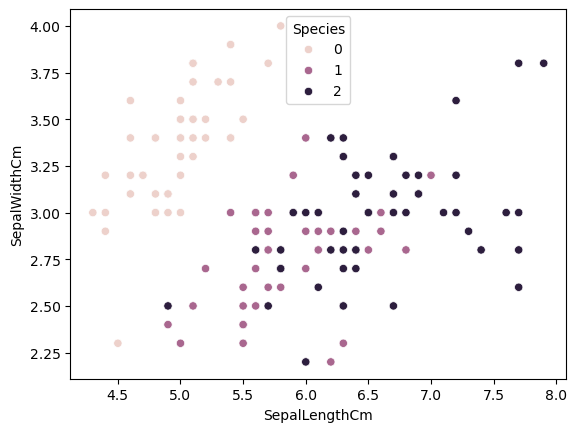

In [11]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.show()

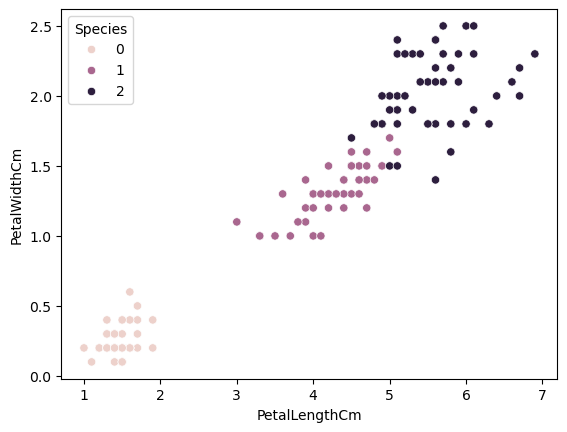

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')
plt.show()

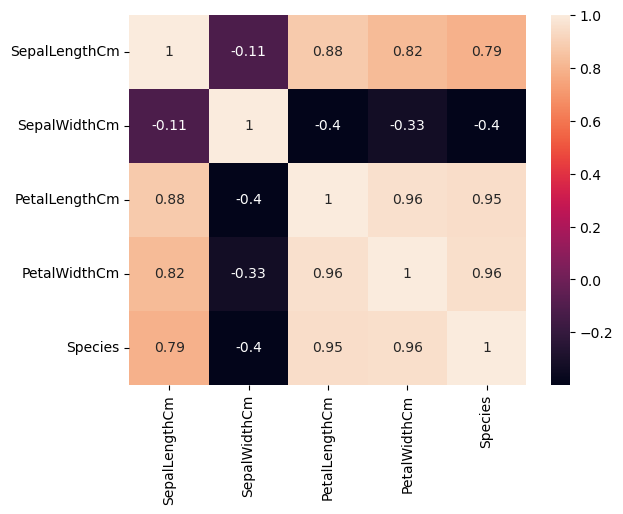

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Handle missing values if necessary
numeric_df = numeric_df.dropna()

# Compute and plot the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [14]:
corr_matrix = df.corr()
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.113977,0.879374,0.822577,0.788053
SepalWidthCm,-0.113977,1.000000,-0.397123,-0.329782,-0.397265
PetalLengthCm,0.879374,-0.397123,1.000000,0.961755,0.947469
PetalWidthCm,0.822577,-0.329782,0.961755,1.000000,0.955549
Species,0.788053,-0.397265,0.947469,0.955549,1.000000


#### Key Findings

- PetalLengthCm and PetalWidthCm are highly correlated, and they also have strong positive correlations with the species feature. These could be important features for classification.
- SepalWidthCm has weaker and negative correlations with other features, making it less relevant for predicting species compared to the petal dimensions.
- SepalLengthCm and Species also have a moderate positive correlation, indicating that sepal length plays a role in distinguishing between species, but petal-related features are likely more important.

### 7. Models

In [15]:
# Train Logistic Regression Classifier
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train SVM Classifier
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

### 8. Evaluate Models


Evaluation for Logistic Regression:
Accuracy: 0.972972972972973
Precision: 0.9752252252252251
Recall: 0.972972972972973
F1 Score: 0.9731245972480194
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



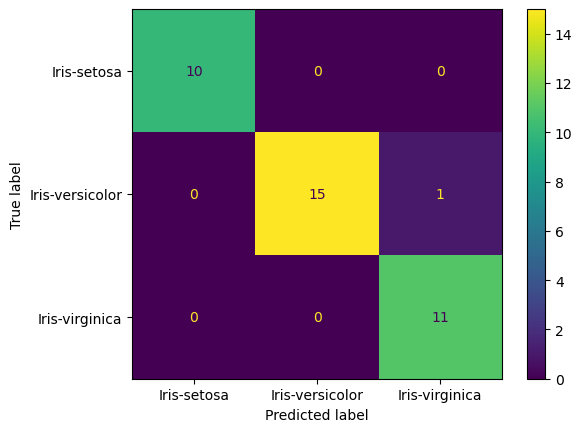


Evaluation for Decision Tree:
Accuracy: 0.972972972972973
Precision: 0.9752252252252251
Recall: 0.972972972972973
F1 Score: 0.9731245972480194
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



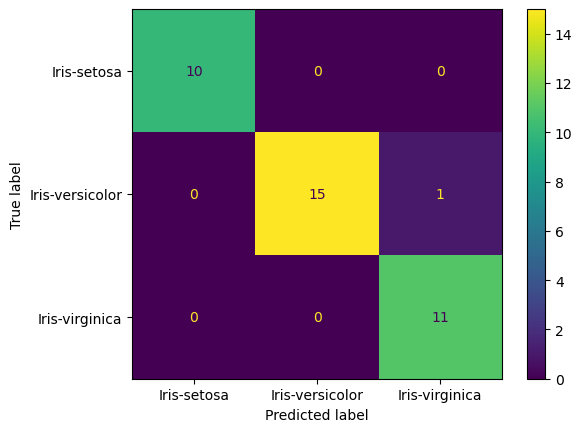


Evaluation for SVM:
Accuracy: 0.972972972972973
Precision: 0.9752252252252251
Recall: 0.972972972972973
F1 Score: 0.9731245972480194
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



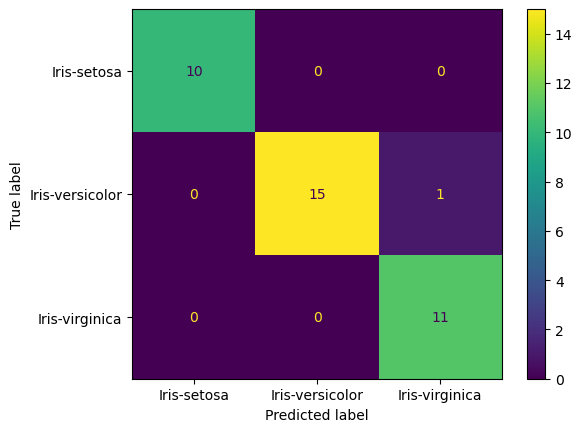

In [16]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"\nEvaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=encoder.classes_)
    disp.plot()
    plt.show()

# Print evaluations
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("SVM", y_test, y_pred_svm)


#### Key Findings

- Accuracy: All three models have an accuracy of 97.3%, meaning that they correctly classified 97.3% of the instances.
- Precision: All three models have a precision of 0.9752, meaning that when they predicted a class, they were correct 97.5% of the time. Precision measures the number of correct positive predictions relative to all positive predictions made.
- Recall: Recall is also 0.9730, indicating that the models correctly identified 97.3% of all actual positive cases. This metric is particularly important when false negatives are costly.
- F1 Score: The F1 score is 0.9731, which is the harmonic mean of precision and recall. It shows a good balance between precision and recall, indicating that the models are not biased toward one over the other.

The models are performing very well with a high overall accuracy and good balance across precision, recall, and F1 score. While there is slight variation in the performance for individual classes (especially with recall for Class 1 and precision for Class 2), the models are generally robust and could be fine-tuned further if needed, especially for handling any small class imbalances or misclassifications.

# Cluster Analysis

K-Means is sensitive to the number of clusters (n_clusters). To find the optimal number of clusters, we can use the Elbow Method.

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

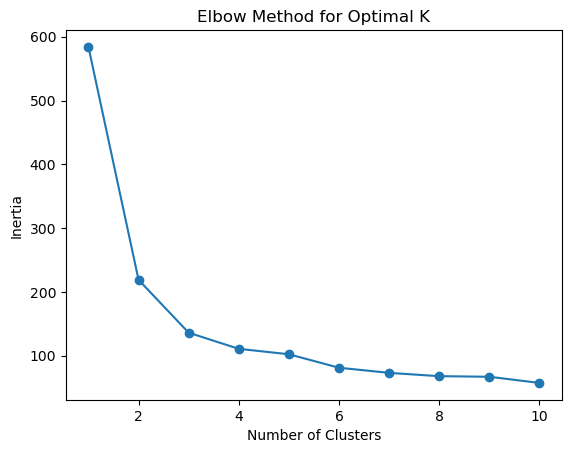

In [17]:
# K-Means Clustering

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering with Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


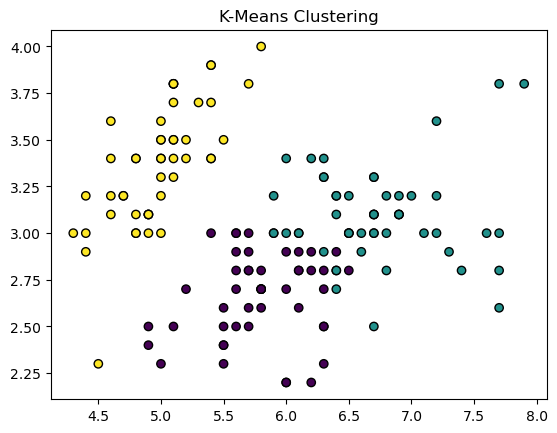

In [18]:
# Fit KMeans with optimal clusters (we can assume 3 from Elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.title("K-Means Clustering")
plt.show()

GMM models can identify multiple cluster shapes, and the BIC (Bayesian Information Criterion) can be used to evaluate the best number of components.

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


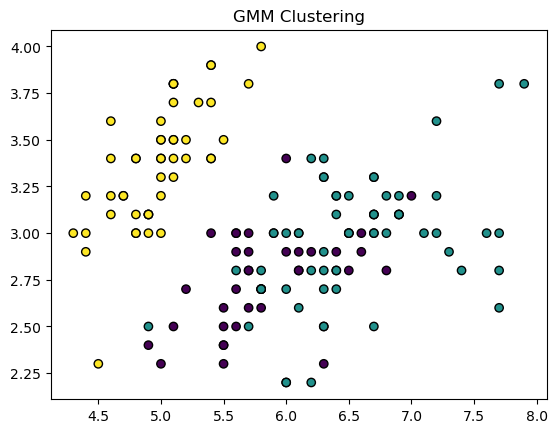

In [19]:
# Gaussian Mixture Model (GMM) Clustering

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=gmm_labels, cmap='viridis', edgecolors='k')
plt.title("GMM Clustering")
plt.show()

DBSCAN identifies dense regions and outliers. DBSCAN doesn't require specifying the number of clusters, and it may detect noise (outliers). The number of clusters is determined by the density parameters eps and min_samples.

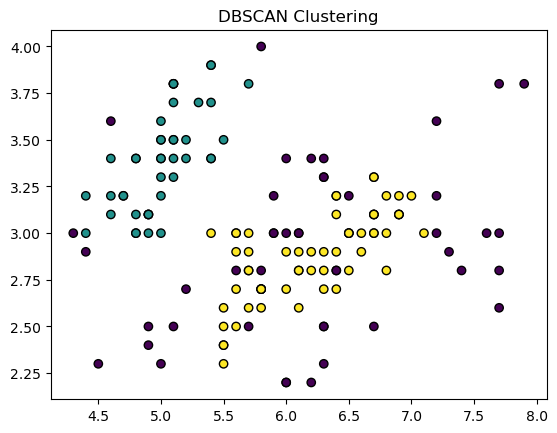

In [20]:
# DBSCAN Clustering

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
plt.title("DBSCAN Clustering")
plt.show()

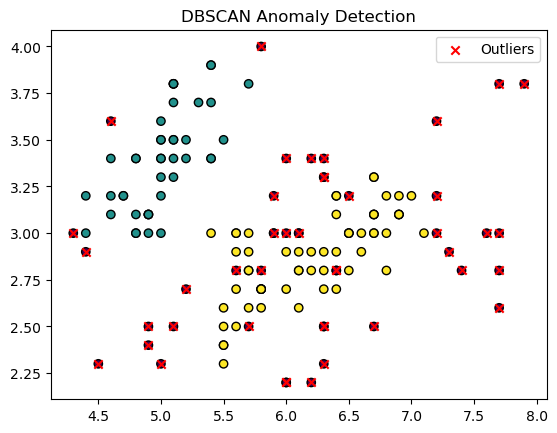

In [21]:
# DBSCAN Anomaly (Outlier) Detection
dbscan_anomaly = DBSCAN(eps=0.5, min_samples=5)
dbscan_anomaly_labels = dbscan_anomaly.fit_predict(X_scaled)
outliers = dbscan_anomaly_labels == -1
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_anomaly_labels, cmap='viridis', edgecolors='k')
plt.scatter(X.iloc[outliers, 0], X.iloc[outliers, 1], color='red', marker='x', label='Outliers')
plt.title("DBSCAN Anomaly Detection")
plt.legend()
plt.show()

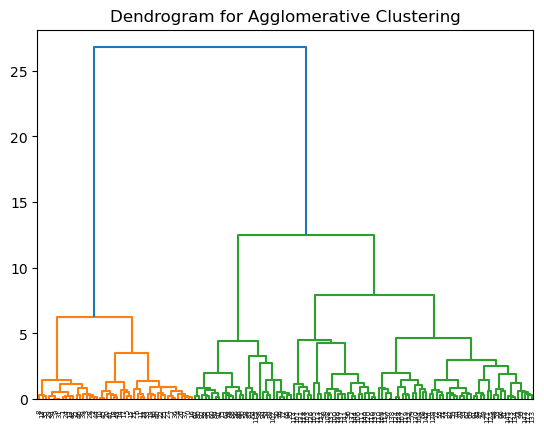

In [22]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)
dendrogram(linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Agglomerative Clustering")
plt.show()

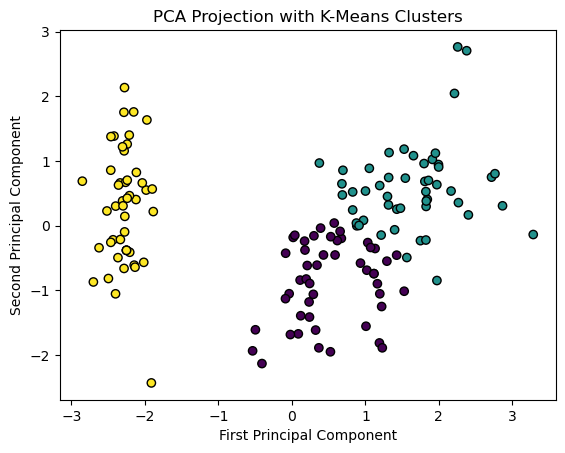

In [23]:
# PCA for Dimensionality Reduction to visualize clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.title("PCA Projection with K-Means Clusters")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [24]:
# Interpret clusters
# Examine cluster centers in KMeans or GMM for insights
print("K-Means Cluster Centers: ")
print(kmeans.cluster_centers_)

K-Means Cluster Centers: 
[[-0.073302   -0.93348936  0.31503218  0.24849713]
 [ 1.06727236  0.12954552  0.94938958  0.96619065]
 [-1.0589749   0.83539793 -1.33842672 -1.28693388]]


#### Key Findings

**Cluster 1: [-0.073302, -0.93348936, 0.31503218, 0.24849713]**
- This cluster has relatively low values for the first and second features, but moderately higher values for the third and fourth features.
- These centroids suggest that the typical data points in this cluster have low values for some features and moderate values for others.

**Cluster 2: [ 1.06727236, 0.12954552, 0.94938958, 0.96619065]**
- This cluster has high values for all features, suggesting that the typical data points in this cluster are characterized by higher values across the board.
- This could indicate a cluster with distinct characteristics that differ from the other clusters, such as more pronounced values for the features.

**Cluster 3: [-1.0589749, 0.83539793, -1.33842672, -1.28693388]**
- This cluster has negative values for most of the features, particularly the first and third features.
- It may represent a group of data points that are significantly lower in most dimensions compared to the other clusters.

# Conclusion

This project thoroughly analyzes the Iris dataset through both supervised and unsupervised learning techniques to understand its structure and identify patterns. We applied classification models, including Logistic Regression, Decision Tree, and Support Vector Machine (SVM), all of which achieved an impressive accuracy of 97.3%. These models demonstrated a good balance across precision, recall, and F1 score, showing that they are highly reliable in classifying species and identifying true positives without significant bias. However, there is still room for minor improvements, particularly in handling class imbalances or fine-tuning the models to enhance performance for specific species.

In terms of feature analysis, petal dimensions (Petal Length and Petal Width) exhibit strong correlations with the species, making them key features for classification. Sepal Length also plays an important role but with less influence compared to the petal features. The presence of some outliers, especially in Sepal Width, indicates the need for careful preprocessing in future analysis.

Unsupervised clustering techniques, such as K-Means, Gaussian Mixture Model (GMM), and DBSCAN, provided valuable insights into natural groupings within the data. The three clusters identified in the K-Means analysis suggest distinct patterns, with Cluster 2 representing data points with higher feature values, Cluster 1 representing moderate values, and Cluster 3 representing lower values. These clusters reflect the diversity within the Iris dataset and may align with different species or environmental conditions.

Overall, the combination of classification and clustering methods highlights the robustness of the Iris dataset in terms of clear class separations and strong feature relationships. Future work could involve further refinement of the models, deeper exploration of outlier handling, and investigating the impact of dimensionality reduction on clustering and classification performance. This analysis confirms that the Iris dataset is well-suited for machine learning applications and offers a clear pathway for future model optimization and feature exploration.